# LCRTest1

## Setup and Data

In [35]:
# Imports functions into the program
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#These are imported specifically for the use of the histogram.
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib import gridspec
from scipy import stats

#Imported for categorization of the Sources
from fractional_variability import fvar
from fermi_catalog import select_bll, select_fsrq, select_bcu

In [2]:
table = "new_db_Feb2023.csv"
opened = open(table,"r")
readed = pd.read_csv(table, sep=",", na_filter=True)
readed = readed.fillna(-3333)

cadence = 'daily'
cadence_df = readed.loc[(readed['cadence'] == cadence) #& \
                        # (readed['ts2'] <= 4.) & \
                        # (readed['photon_flux_error2'] <  readed['photon_flux2'])
                        ]
#cadence_df.loc[cadence_df['ts2'] <= 9., 'photon_flux2'] = -3333
cadence_df.loc[cadence_df['ts2'] <= 4., ['photon_flux2', 'photon_flux_error2']] = -3333
#Jorge: Set as -3333 all points with an error larger than the flux
cadence_df.loc[cadence_df['photon_flux_error2'] > cadence_df['photon_flux2'], ['photon_flux2', 'photon_flux_error2']] = -3333
#Jorge: Set cuts to remove possible outliers due to bad convergence of a bin
cadence_df.loc[cadence_df['photon_flux2'] > 1e-4, ['photon_flux2', 'photon_flux_error2']] = -3333
cadence_df.loc[cadence_df['photon_flux2'] < 1e-10, ['photon_flux2', 'photon_flux_error2']] = -3333
print(cadence_df)

TSTART = np.amin(cadence_df['tmin'])
TSTOP = np.amax(cadence_df['tmax'])

names = np.unique(readed['source_name']) #.drop_duplicates(subset=['source_name'], inplace=False)#[1]

         Unnamed: 0        source_name cadence       tmin       tmax  \
0                 0  4FGL J0001.2-0747   daily  239587201  239846401   
1                 1  4FGL J0001.5+2113   daily  239587201  239846401   
2                 2  4FGL J0003.3-1928   daily  239587201  239846401   
3                 3  4FGL J0004.3+4614   daily  239587201  239846401   
4                 4  4FGL J0004.4-4737   daily  239587201  239846401   
...             ...                ...     ...        ...        ...   
4131220     4131220  4FGL J2358.0-4601   daily  698889601  699148801   
4131221     4131221  4FGL J2358.3-1021   daily  698889601  699148801   
4131222     4131222  4FGL J2358.3+3830   daily  698889601  699148801   
4131223     4131223  4FGL J2359.0+3922   daily  698889601  699148801   
4131224     4131224  4FGL J2359.2-3134   daily  698889601  699148801   

         photon_flux2  photon_flux_error2  photon_index2  return_code2  \
0       -3.333000e+03       -3.333000e+03           2.18     

In [3]:
fsrq_df = select_fsrq()
fsrq_names = fsrq_df['Source_Name']

fsrq_fmatrix = []
fsrq_fractionalflux = []
fsrq_nanbins = []
fsrq_nanbinsmatrix = []
for i, fsrq in enumerate(fsrq_names):
    print(i, fsrq)
    source_array = cadence_df.loc[cadence_df['source_name'] == fsrq]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    flux_err = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    fsrq_nanbins.append(len(source_array[source_array['photon_flux2']== -3333]))
    fsrq_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
    fsrq_fmatrix.append(factors.tolist())
    fsrq_fractionalflux.append([fsrq, averageflux, var, var_err])

fsrq_fmatrix = np.array(fsrq_fmatrix)
fsrq_nanbinsmatrix = np.array(fsrq_nanbinsmatrix)

-----------------------------
Selecting FSRQ type blazars
Total number of variable objects: 572
0 4FGL J0001.5+2113
1 4FGL J0004.3+4614
2 4FGL J0004.4-4737
3 4FGL J0005.9+3824
4 4FGL J0010.6+2043
5 4FGL J0010.6-3025
6 4FGL J0011.4+0057
7 4FGL J0016.2-0016
8 4FGL J0017.5-0514
9 4FGL J0019.6+7327
10 4FGL J0023.7-6820
11 4FGL J0023.7+4457
12 4FGL J0024.7+0349
13 4FGL J0028.4+2001
14 4FGL J0030.3-4224
15 4FGL J0038.2-2459
16 4FGL J0043.8+3425
17 4FGL J0044.2-8424
18 4FGL J0045.1-3706
19 4FGL J0047.9+2233
20 4FGL J0050.0-5736
21 4FGL J0050.4-0452
22 4FGL J0051.1-0648
23 4FGL J0051.5-4220
24 4FGL J0058.0-0539
25 4FGL J0058.4+3315
26 4FGL J0102.4+4214
27 4FGL J0102.8+5824
28 4FGL J0104.8-2416
29 4FGL J0108.6+0134
30 4FGL J0109.7+6133
31 4FGL J0112.0-6634
32 4FGL J0112.8+3208
33 4FGL J0113.1-3553
34 4FGL J0113.4+4948
35 4FGL J0115.1-0129
36 4FGL J0116.0-1136
37 4FGL J0117.8-2109
38 4FGL J0118.9-2141
39 4FGL J0126.0-2221
40 4FGL J0128.5+4440
41 4FGL J0132.7-1654
42 4FGL J0133.1-5201
43 4FGL J01

In [4]:
bll_df = select_bll()
bll_names = bll_df['Source_Name']

bll_fmatrix = []
bll_fractionalflux = []
bll_nanbins = []
bll_nanbinsmatrix = []
for i, bll in enumerate(bll_names):
    # print(i, bll)
    source_array = cadence_df.loc[cadence_df['source_name'] == bll]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux2'])
    flux_err = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    bll_nanbins.append(len(source_array[source_array['photon_flux2']==-3333]))
    bll_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
    bll_fmatrix.append(factors.tolist())
    bll_fractionalflux.append([bll, averageflux, var, var_err])

bll_fmatrix = np.array(bll_fmatrix)
bll_nanbinsmatrix = np.array(bll_nanbinsmatrix)


-----------------------------
Selecting BL Lac type blazars
Total number of variable objects: 477


In [5]:
bcu_df = select_bcu()
bcu_names = bcu_df['Source_Name']

bcu_fmatrix = []
bcu_fractionalflux = []
bcu_nanbins = []
bcu_nanbinsmatrix = []
for i, bcu in enumerate(bcu_names):
    # print(i, bcu)
    source_array = cadence_df.loc[cadence_df['source_name'] == bcu]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux2'])
    flux_err = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    bcu_nanbins.append(len(source_array[source_array['photon_flux2']==-3333]))
    bcu_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
    bcu_fmatrix.append(factors.tolist())
    bcu_fractionalflux.append([bll, averageflux, var, var_err])

bcu_fmatrix = np.array(bcu_fmatrix)
bcu_nanbinsmatrix = np.array(bcu_nanbinsmatrix)


-----------------------------
Selecting unknown type blazars
Total number of variable objects: 364


In [6]:
# This function takes the dataframe of sources of variable objects, and the name of a source.
# It will sort through every entry in the dataframe, and detect consecutive entries with a flux level higher than the average.
# It counts the duration of these flaring states, and notes them in an array 'final', which it returns upon completion.
def flare_detector(name,dataframe):
    final = [0,0,0]
    k=0
    temp =[]
    temp_err=[]
    duration = []
    average=[]
    # This section is for setting up our dataframes which will be used in the following loop.
    # We primarily are eliminating outliers and NaN values that were marked with -3333.
    sourcematrix = dataframe.loc[dataframe['source_name'] == name].reset_index(drop=True)
    fluxmatrix = sourcematrix[sourcematrix['photon_flux2']!=-3333]['photon_flux2'].reset_index(drop=True)
    averageflux = np.mean(sourcematrix[sourcematrix['photon_flux2']!=-3333]['photon_flux2'])
    errormatrix = sourcematrix[sourcematrix['photon_flux_error2']!=-3333]['photon_flux_error2'].reset_index(drop=True)
    boolmatrix = fluxmatrix/averageflux > 1  
    boolmatrix = boolmatrix.reset_index(drop=True)
    for i in range(len(fluxmatrix)):
        # If the flux value for index i is greater than the average, then this condition is met.
        if boolmatrix[i] == True:
            temp.append(fluxmatrix[i])
            temp_err.append(errormatrix[i])
        # If the flux value is not above average, and there are values stored in the temp array, we gather them and send them to 'final'.
        elif len(temp) != 0:
            if i != 0:
                duration = ((len(temp)))
                average = np.nanmean(temp)
                error = ((sum(k*k for k in temp_err))**0.5)*(1/(len(temp_err)))
                temp = []
                temp_err = []
                final = np.vstack([final,[duration,average,error]])
        # Otherwise, we add a row of 0's to show that the source has no flaring states.
        else:
            final = np.vstack([final,[0,0,0]])


    return final

In [7]:
# These three loops will run the flare_detector function for each category of blazar.

fsrq_flares = [0,0,0]
for i,name in enumerate(fsrq_names):
    #print(i,name) 
    #print(flare_detector(name,cadence_df))
    fsrq_flares = np.vstack([fsrq_flares,flare_detector(name,cadence_df)])

bll_flares = [0,0,0]
for i,name in enumerate(bll_names):
    #print(i,name) 
    #print(flare_detector(name,cadence_df))
    bll_flares = np.vstack([bll_flares,flare_detector(name,cadence_df)])

bcu_flares = [0,0,0]
for i,name in enumerate(bcu_names):
    #print(i,name) 
    #print(flare_detector(name,cadence_df))
    bcu_flares = np.vstack([bcu_flares,flare_detector(name,cadence_df)])


<function matplotlib.pyplot.show(close=None, block=None)>

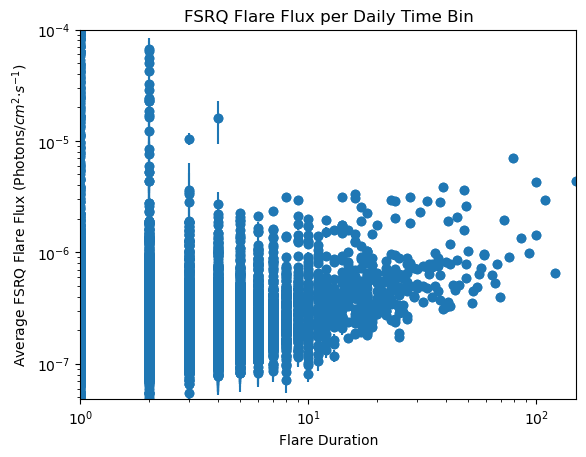

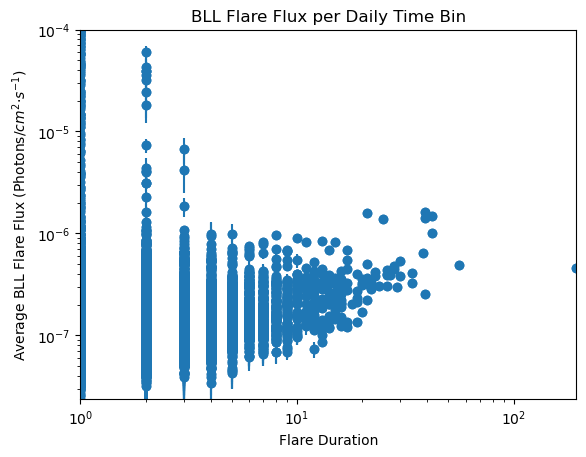

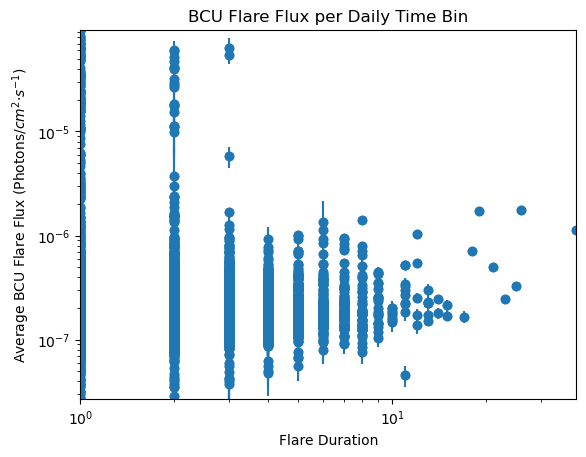

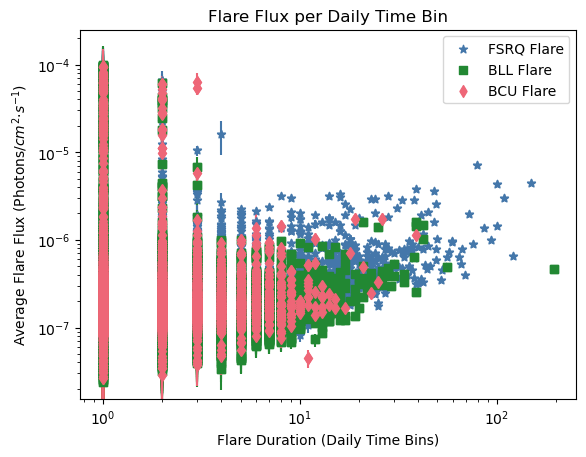

In [34]:

# This section makes four Average Flux vs Duration plots: one for each category of blazars, and a final plot for all three together.
    
fsrq_plot = fsrq_flares[fsrq_flares[:,0]!=0]
fsrq_ysize = fsrq_flares.size
fsrq_x = fsrq_plot[:,0]
fsrq_xmin = min(fsrq_x)
fsrq_xmax = max(fsrq_x)
fsrq_y = fsrq_plot[:,1]
fsrq_ymin = min(fsrq_y)
fsrq_ymax = max(fsrq_y)
fsrq_err=fsrq_plot[:,2]
plt.ylim([fsrq_ymin,fsrq_ymax])
plt.xlim([fsrq_xmin,fsrq_xmax])
plt.scatter(fsrq_x,fsrq_y)
plt.errorbar(fsrq_x,fsrq_y,yerr=fsrq_err,fmt = 'o')
plt.ylabel('Average FSRQ Flare Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.xlabel('Flare Duration')
plt.title('FSRQ Flare Flux per Daily Time Bin')
plt.yscale('log')
plt.xscale('log')
plt.figure()

bll_plot = bll_flares[bll_flares[:,0]!=0]
bll_ysize = bll_flares.size
bll_x = bll_plot[:,0]
bll_xmin = min(bll_x)
bll_xmax = max(bll_x)
bll_y = bll_plot[:,1]
bll_ymin = min(bll_y)
bll_ymax = max(bll_y)
bll_err=bll_plot[:,2]
plt.ylim([bll_ymin,bll_ymax])
plt.xlim([bll_xmin,bll_xmax])
plt.scatter(bll_x,bll_y)
plt.errorbar(bll_x,bll_y,yerr=bll_err,fmt = 'o')
plt.ylabel('Average BLL Flare Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.xlabel('Flare Duration')
plt.title('BLL Flare Flux per Daily Time Bin')
plt.yscale('log')
plt.xscale('log')
plt.figure()

bcu_plot = bcu_flares[bcu_flares[:,0]!=0]
ysize = bcu_flares.size
bcu_x = bcu_plot[:,0]
bcu_xmin = min(bcu_x)
bcu_xmax = max(bcu_x)
bcu_y = bcu_plot[:,1]
bcu_ymin = min(bcu_y)
bcu_ymax = max(bcu_y)
bcu_err = bcu_plot[:,2]
plt.ylim([bcu_ymin,bcu_ymax])
plt.xlim([bcu_xmin,bcu_xmax])
plt.scatter(bcu_x,bcu_y)
plt.errorbar(bcu_x,bcu_y,yerr=bcu_err,fmt = 'o')
plt.ylabel('Average BCU Flare Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.xlabel('Flare Duration')
plt.title('BCU Flare Flux per Daily Time Bin')
plt.yscale('log')
plt.xscale('log')
plt.figure()

#Combined Graphic
plt.scatter(fsrq_x,fsrq_y,marker = '*',color='#4477AA',label='FSRQ Flare')
plt.errorbar(fsrq_x,fsrq_y,yerr=fsrq_err,fmt = '*',color='#4477AA')
plt.scatter(bll_x,bll_y,marker = 's',color='#228833',label='BLL Flare')
plt.errorbar(bll_x,bll_y,yerr=bll_err,fmt = 's',color='#228833')
plt.scatter(bcu_x,bcu_y,marker = 'd',color='#EE6677',label='BCU Flare')
plt.errorbar(bcu_x,bcu_y,yerr=bcu_err,fmt = 'd',color='#EE6677')
plt.legend()
plt.ylabel('Average Flare Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.xlabel('Flare Duration (Daily Time Bins)')
plt.title('Flare Flux per Daily Time Bin')
plt.yscale('log')
plt.xscale('log')
#plt.xlim(7,max(fsrq_xmax,bll_xmax,bcu_xmax))
#plt.ylim(0.0000001,0.00001)
plt.show
#Flux is 1/cm^2*s


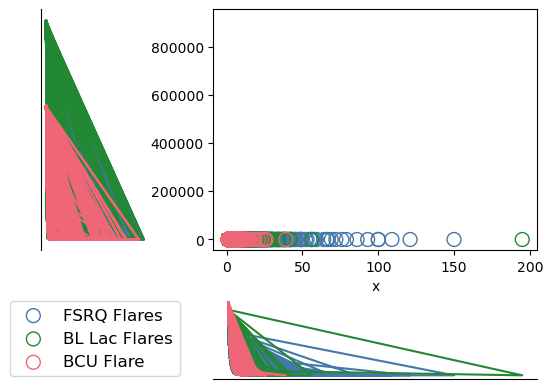

In [55]:
label = ['FSRQ Flares','BL Lac Flares','BCU Flare'] # List of labels for categories
cl = ['#4477AA','#228833','#EE6677'] # List of colours for categories
categories = len(label)




# Set up 4 subplots as axis objects using GridSpec:
gs = gridspec.GridSpec(2, 2, width_ratios=[1,3], height_ratios=[3,1])
# Add space between scatter plot and KDE plots to accommodate axis labels:
gs.update(hspace=0.3, wspace=0.3)

# Set background canvas colour to White instead of grey default
fig = plt.figure()
fig.patch.set_facecolor('white')

ax = plt.subplot(gs[0,1]) # Instantiate scatter plot area and axis range
#ax.set_xlim(x.min(), x.max())
#ax.set_ylim(y.min(), y.max())
ax.set_xlabel('x')
ax.set_ylabel('y')

axl = plt.subplot(gs[0,0], sharey=ax) # Instantiate left KDE plot area
axl.get_xaxis().set_visible(False) # Hide tick marks and spines
axl.get_yaxis().set_visible(False)
axl.spines["right"].set_visible(False)
axl.spines["top"].set_visible(False)
axl.spines["bottom"].set_visible(False)

axb = plt.subplot(gs[1,1], sharex=ax) # Instantiate bottom KDE plot area
axb.get_xaxis().set_visible(False) # Hide tick marks and spines
axb.get_yaxis().set_visible(False)
axb.spines["right"].set_visible(False)
axb.spines["top"].set_visible(False)
axb.spines["left"].set_visible(False)

axc = plt.subplot(gs[1,0]) # Instantiate legend plot area
axc.axis('off') # Hide tick marks and spines

# Plot data for each categorical variable as scatter and marginal KDE plots:
#FSRQ PLOT
ax.scatter(fsrq_x,fsrq_y, color='none', label=label[0], s=100, edgecolor= cl[0])
kde = stats.gaussian_kde(fsrq_x)
axb.plot(fsrq_x, kde(fsrq_x), color=cl[0])
kde = stats.gaussian_kde(fsrq_y)
axl.plot(fsrq_y, kde(fsrq_y), color=cl[0])

#FSRQ PLOT
ax.scatter(bll_x,bll_y, color='none', label=label[1], s=100, edgecolor= cl[1])
kde = stats.gaussian_kde(bll_x)
axb.plot(bll_x, kde(bll_x), color=cl[1])
kde = stats.gaussian_kde(fsrq_y)
axl.plot(bll_y, kde(bll_y), color=cl[1])

#FSRQ PLOT
ax.scatter(bcu_x,bcu_y, color='none', label=label[2], s=100, edgecolor= cl[2])
kde = stats.gaussian_kde(bcu_x)
axb.plot(bcu_x, kde(bcu_x), color=cl[2])
kde = stats.gaussian_kde(bcu_y)
axl.plot(bcu_y, kde(bcu_y), color=cl[2])

# Copy legend object from scatter plot to lower left subplot and display:
# NB 'scatterpoints = 1' customises legend box to show only 1 handle (icon) per label 
handles, labels = ax.get_legend_handles_labels()
axc.legend(handles, labels, scatterpoints = 1, loc = 'center', fontsize = 12)
#plt.yscale('log')
#plt.xscale('log')
plt.show()

27031